In [1]:
import pandas as pd
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

### **Reading datasets**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

train_df = pd.read_csv('/content/drive/MyDrive/fashion-mnist_train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/fashion-mnist_test.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
train_df.shape, test_df.shape

((60000, 785), (10000, 785))

**Each row is a different image representation in the form pixel data.**

In [10]:
train_df.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4,0,0,0,5,4,5,5,3,5,...,7,8,7,4,3,7,5,0,0,0
6,4,0,0,0,0,0,0,0,0,0,...,14,0,0,0,0,0,0,0,0,0
7,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,4,0,0,0,0,0,0,3,2,0,...,1,0,0,0,0,0,0,0,0,0
9,8,0,0,0,0,0,0,0,0,0,...,203,214,166,0,0,0,0,0,0,0


In [11]:
test_df.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,44,105,44,10,...,105,64,30,0,0,0,0,0,0,0
6,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,6,0,0,0,0,0,0,0,1,0,...,174,136,155,31,0,1,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,57,70,28,0,2,0,0,0,0,0


### **Transforming it to float32 to be acceptable by tensorflow and keras**

In [4]:
train_data = np.array(train_df, dtype='float32')
test_data = np.array(test_df, dtype = 'float32')

In [13]:
# mask = np.isnan(train_data).astype(np.uint8)
# train_data = cv2.inpaint(train_data.astype(np.float32), mask, inpaintRadius=3, flags=cv2.INPAINT_TELEA)

# mask = np.isnan(test_data).astype(np.uint8)
# test_data = cv2.inpaint(test_data.astype(np.float32), mask, inpaintRadius=3, flags=cv2.INPAINT_TELEA)

In [5]:
np.isnan(train_data).any(), np.isnan(test_data).any()

(False, False)

### **Now slicing the dataframes separating X (image features) and y (image label)**

In [6]:
X_train = train_data[:,1:] # select all lines and all columns excluding the first one
y_train = train_data[:,0] # select only first column and all lines

In [8]:
X_test = test_data[:,1:]
y_test = test_data[:,0]

### **Normalize pixel values to the range [0,1]**

In [9]:
X_train = X_train / 255
X_test = X_test / 255

In [10]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [11]:
X_train, X_validate, y_train, y_validate = train_test_split(X_train,y_train,test_size = 0.2,random_state = 42)

### **Sample of images after resize of the data**

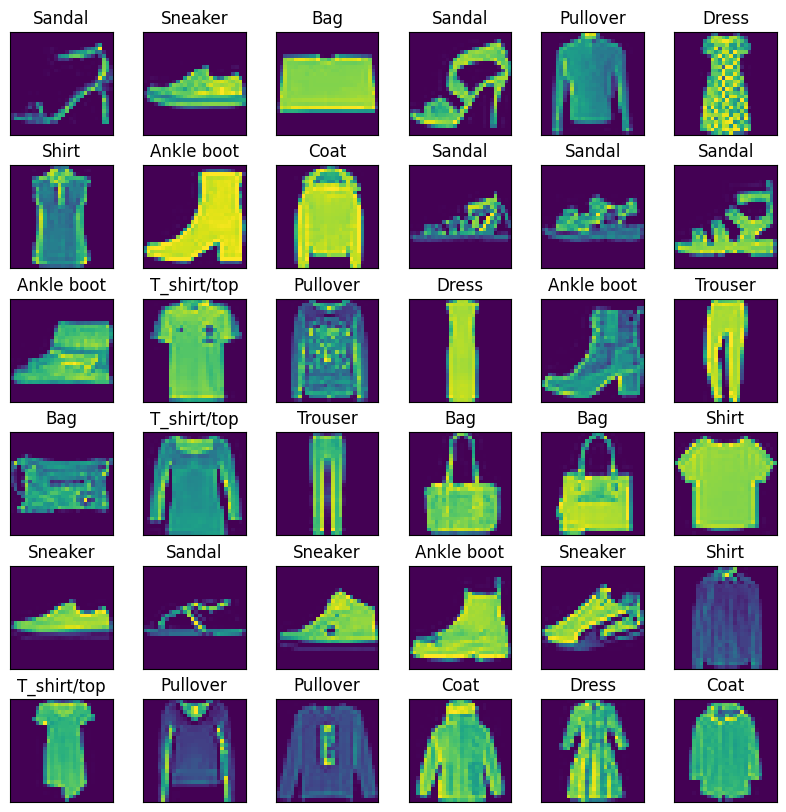

In [12]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10, 10))
for i in range(36):
    plt.subplot(6, 6, i + 1) # to hide the x and y ticks and make the display much cleaner
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape((28,28))) # reshaped back into 2d array
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.subplots_adjust(hspace=0.3)
plt.show()

### **Constructing Neural Network Architecture**

In [13]:
# preparing image data
image_cols = 28
image_rows = 28
image_shape = (image_cols, image_rows, 1) # 1 cause it's one channel image since it's grayscale

In [14]:
# we unpack image_shape and append it to X.shape[0] to finalize acceptable input format.
# CNN accpets 2D input and 3D input such as videos or multi-channel images.
X_train = X_train.reshape(X_train.shape[0],*image_shape)
X_test = X_test.reshape(X_test.shape[0],*image_shape)
X_validate = X_validate.reshape(X_validate.shape[0],*image_shape)

In [15]:
model = models.Sequential([
    layers.Conv2D(32,(3,3),activation = 'relu',input_shape = image_shape),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.5),
    layers.Flatten(),
    layers.Dense(32, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
    ])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = Adam(learning_rate=0.001), metrics = ['accuracy'])

In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │         173,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 173,738 (678.66 KB)

 Trainable params: 173,738 (678.66 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
training_report = model.fit(X_train, y_train, batch_size = 4096, epochs = 75,verbose = 1, validation_data = (X_validate, y_validate))

Epoch 1/75
12/12 ━━━━━━━━━━━━━━━━━━━━ 39s 3s/step - accuracy: 0.3483 - loss: 1.9377 - val_accuracy: 0.7053 - val_loss: 0.9997
Epoch 2/75
12/12 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.7148 - loss: 0.9021 - val_accuracy: 0.7609 - val_loss: 0.6738
Epoch 3/75
12/12 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step - accuracy: 0.7627 - loss: 0.6736 - val_accuracy: 0.7908 - val_loss: 0.5787
Epoch 4/75
12/12 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.7916 - loss: 0.5902 - val_accuracy: 0.8168 - val_loss: 0.5186
Epoch 5/75
12/12 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.8134 - loss: 0.5337 - val_accuracy: 0.8277 - val_loss: 0.4877
Epoch 6/75
12/12 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.8229 - loss: 0.5005 - val_accuracy: 0.8396 - val_loss: 0.4625
Epoch 7/75
12/12 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.8312 - loss: 0.4747 - val_accuracy: 0.8472 - val_loss: 0.4439
Epoch 8/75
12/12 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.8365 - loss: 0.4564 - val_accuracy: 0.8518 - val_loss:

In [19]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9085 - loss: 0.2578
Test accuracy: 0.9121999740600586
Test loss: 0.25354647636413574


### **Classification Report**

In [20]:
#Get the predictions for the test data
y_pred =  model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
#Get the indices to be plotted
y_true = test_df.iloc[:, 0]
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(10)]
print(classification_report(y_true, y_pred_classes, target_names=target_names))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
              precision    recall  f1-score   support

     Class 0       0.86      0.86      0.86      1000
     Class 1       0.99      0.98      0.98      1000
     Class 2       0.89      0.84      0.86      1000
     Class 3       0.89      0.94      0.92      1000
     Class 4       0.86      0.89      0.87      1000
     Class 5       0.99      0.97      0.98      1000
     Class 6       0.76      0.73      0.75      1000
     Class 7       0.95      0.97      0.96      1000
     Class 8       0.97      0.98      0.98      1000
     Class 9       0.96      0.97      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



Text(0.5, 1.0, 'Training - accuracy')

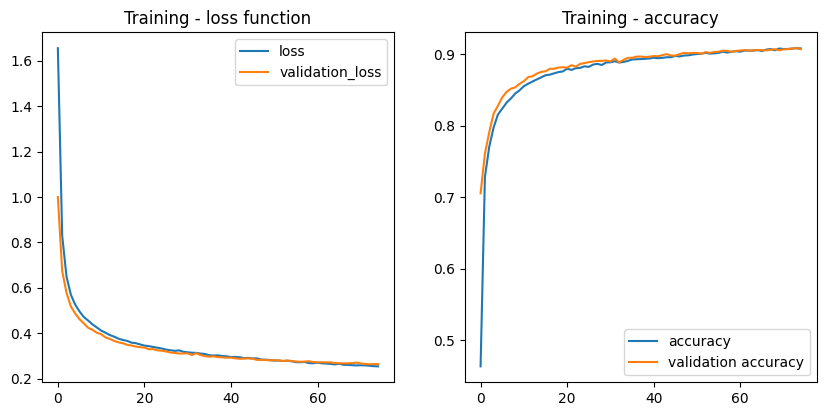

In [22]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(training_report.history['loss'], label = 'loss')
plt.plot(training_report.history['val_loss'], label='validation_loss')
plt.legend()
plt.title('Training - loss function')

plt.subplot(2,2,2)
plt.plot(training_report.history['accuracy'],label = 'accuracy')
plt.plot(training_report.history['val_accuracy'],label='validation accuracy')
plt.legend()
plt.title('Training - accuracy')

**We understand that there's no overfitting since loss and validation loss both decrease, and accuracy and validation accuracy both increase.**

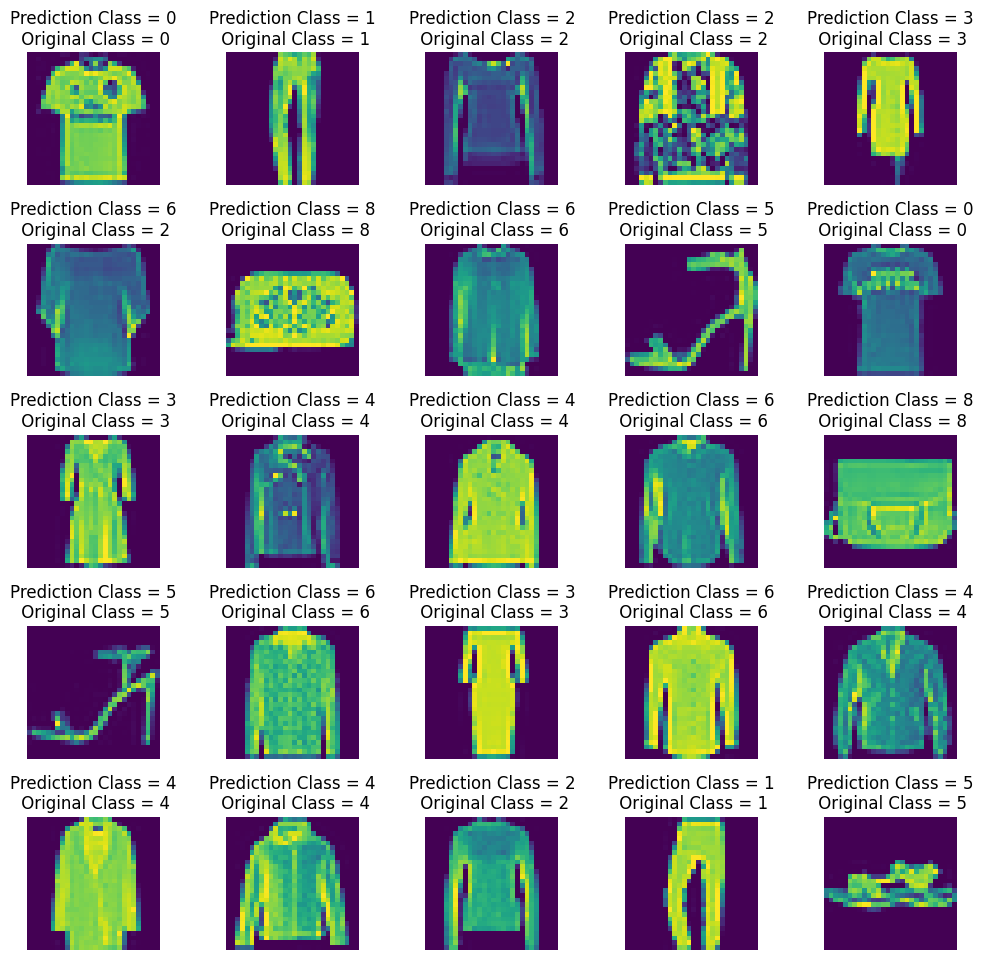

In [23]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title(f"Prediction Class = {int(y_pred_classes[i])}\n Original Class = {int(y_test[i])}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)